**Ejemplos prácticos**

*1. Aplicando una tasa de 8% efectivo anual, calcular el VAN de una operación de inversión con las siguientes características: Desembolso de 1.100.000 €. Siendo las recuperaciones de 200.000 € transcurrido un trimestre, 300.000 € transcurridos dos trimestres más, 400.000 € transcurrido un trimestres más, y 500.000 transcurridos cuatro trimestres más. La duración total la operación es de dos años.*

In [3]:
pip install numpy-financial

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy_financial as npf
import numpy as np

In [6]:
cf = [-1100000, 200000, 0, 300000, 400000, 0, 0, 0, 500000] #Los periodos sin retorno de inversión se deben valorar a 0
i = 0.08
n = 4
itri = (1+i)**(1/n)-1


VAN = npf.npv(rate = itri, values = cf)
print(round(VAN,2))

178402.55


*2. Aplicando una tasa de 10% efectivo anual, calcular el VAN de una operación de inversión cuyo desembolso es de 70.000 € y consta de 8 recuperaciones semestrales de 12.000 € cada una.*

*En este caso, dado que la renta es constante podemos aplicar tanto la fórmula de VNA o VA, vamos a verlo aplicado*

In [18]:
#Fórmula VNA

cf = [-70000, 12000, 12000, 12000, 12000, 12000, 12000, 12000, 12000]
i = 0.10
n = 6
ises = (1+i)**(1/n)-1

VAN = npf.npv(rate = ises, values = cf)
print(VAN)

#Fórmula VA

pago = 70000
pmt = 12000
m = 8

VA = npf.pv(rate = ises, nper = m, pmt=-pmt, fv=0, when='end')-pago #tenemos que sacar fuera el pago inicial
print(VA)


19436.40761718354
19436.407617183562


*3. Ejemplo de Cálculo VAN con tasas diferentes.*

*Imaginemos que tenemos un proyecto, en que tendremos que realizar un desembolso inicial de 7.000 €, posteriormente nos va a generar unos flujos de caja de 1.000 euros, que irán aumentando 200 euros cada año, hasta llegar al sexto. Igualmente, el primer flujo de caja tendrá una tasa de descuento de 2% que se irá incrementando hasta llegar al 7% en el último año. Queremos conocer el VAN de esta operación para saber si es viable o no.

In [102]:
#En primer lugar, pensemos que los tipos de interés corresponden se corresponden con Estructura Temporal de los Tipos de Interés,
# es decir, que los tipos van cambiando y el segundo flujo de caja estará descontado al 2%, sin tener en cuenta el primer año.

cf = [-7000]
b = list(range(1000, 2200, 200))
cf = cf + b


cf1 = np.array(cf)
print("Flujos de caja: {}".format(cf1))

rate = np.arange(0.01,0.075,0.01)
rate = rate + 1
print("Tasas de descuento: {}".format(rate))

n = np.arange(0,7,1)
print("Periodos: {}".format(n))


VA = cf / (rate)**(n)
VAN = VA.sum()
print("VAN: {}".format(VAN))

Flujos de caja: [-7000  1000  1200  1400  1600  1800  2000]
Tasas de descuento: [1.01 1.02 1.03 1.04 1.05 1.06 1.07]
Periodos: [0 1 2 3 4 5 6]
VAN: 350.1752684214696


*Sin embargo, podemos considerar que el tipo de interés no cambia, y que el primer año siempre será la misma tasa, el segundo año la misma, teniendo que tener en cuenta la primera, y así sucesivamente.*

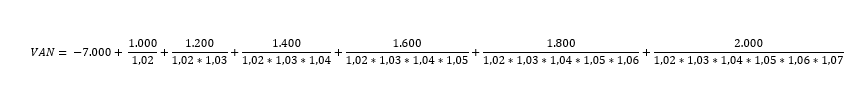

In [116]:
#Segunda opción:

cf = [-7000]
b = list(range(1000, 2200, 200))
cf = cf + b
cf = np.array(cf)


rate = np.arange(0.01,0.075,0.01)
rate = rate + 1
rate[0]= 1

a=1
rate1 = []
for i in rate:
    a = a*i
    rate1.append(a)

rate1 = np.array(rate1)

VAN = sum(cf / (rate1))
print(VAN)    


815.7245572726517


*Lo ideal es crear una función que nos permita calcularlo*

In [ ]:
def Calculo_VAN()

*4. Calcular la TIR de una operación de inversión con las siguientes características: Desembolso de 100.000 €. Siendo las recuperaciones de 10.000 € mensuales durante un año.*

*Dado que es una renta constante podemos utilizar también dos métodos, TIR (IRR) o mediante TASA (RATE)*

In [24]:
#Métdodo TIR(IRR)

cf = [-100000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]

TIR = npf.irr(cf)
print(TIR)

#Método TASA(RATE)

n = 12
pmt = 10000
va = 100000

TASA = npf.rate(nper=n, pmt=pmt, pv=-va, fv=0, when='end')
print(TASA)

0.029228540769133504
0.029228540769158345


*5. Calcular la TIR de una operación de inversión con las siguientes características: Desembolso de 100.000 €. Siendo las recuperaciones de 10.000 € mensuales durante un año, salvo el 3º mes que no se recupera nada y el mes 9º donde se perciben 20.000 €.*


In [27]:
cf = [-100000, 10000, 10000, 0, 10000, 10000, 10000, 10000, 10000, 20000, 10000, 10000, 10000]
n = 12

TIR = npf.irr(cf)     #TIR mensual
print(TIR)
TIRanual = (1+TIR)**n-1
print(TIRanual)

0.026973355461856086
0.3762905031900152
